# SMS Spam Analysis: Text Preprocessing and Visualization

## Dataset Information

Introduction
This notebook presents an analysis of an SMS Spam Collection Dataset, which contains 5,574 SMS messages labeled as either 'ham' (legitimate) or 'spam'. The analysis focuses on text preprocessing, feature extraction, visualization, and statistical analysis to gain insights into the characteristics that differentiate spam messages from legitimate ones. The notebook uses Python and libraries like pandas, numpy, matplotlib, seaborn, wordcloud, nltk, scikit-learn, and textblob.

The dataset can be downloaded from:
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


## Problem Statement
The core problem is to effectively distinguish spam SMS messages from legitimate ones using machine learning techniques. This involves:

Text Preprocessing: Cleaning and transforming the raw text data to make it suitable for analysis.

Feature Extraction: Identifying and engineering relevant features from the preprocessed text, such as message length, word count, sentiment, and TF-IDF scores.

Visualization: Creating visualizations to explore and understand the differences in features between spam and legitimate messages.

Statistical Analysis: Applying statistical methods to quantify the relationships between features and message labels.
The ultimate goal is to identify patterns and characteristics that can be used to build a model for accurate spam detection.

## Prerequisites
```bash
! pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn textblob requests Pillow
```

## Features Implemented
1. Text Preprocessing
   - Lowercase conversion
   - Punctuation removal
   - Number removal
   - Tokenization
   - Stop word removal
   - Lemmatization

2. Feature Extraction
   - Message length
   - Word count
   - Average word length
   - Sentiment analysis
   - TF-IDF features

3. Visualizations
   - Message length distribution
   - Word count distribution
   - Word clouds for spam and legitimate messages
   - Sentiment distribution

4. Statistical Analysis
   - Feature statistics by label
   - Most common words analysis
   - TF-IDF term analysis

## Running the Code
1. Download the dataset and save it as 'spam.csv' in your working directory
2. Run the Python script
3. The code will generate various visualizations and print statistical analyses

## Interpreting the Results
- Box plots show the distribution of various features across spam and legitimate messages
- Word clouds provide visual representation of the most frequent terms
- Statistical analyses provide insights into the characteristics of spam vs. legitimate messages
- TF-IDF analysis reveals the most important terms in each category

## Key Findings
1. Spam messages tend to be longer and contain more words
2. Legitimate messages have more varied vocabulary
3. Sentiment analysis can help distinguish between spam and legitimate messages
4. Certain words and phrases are strongly associated with spam messages



In [5]:
! pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn textblob requests

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [32]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [28]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
# Load the dataset. This cell reads the dataset from a remote URL into a pandas DataFrame.
data_url = "https://raw.githubusercontent.com/DeepakrajaR/SMS-Spam-Analysis-Text-Preprocessing-and-Visualization/main/dataset/spam_ham.csv"

try:
    # Read the data with proper encoding
    df = pd.read_csv(data_url, encoding='latin-1')
    df = df.rename(columns={'v1': 'label', 'v2': 'text'})
    df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    print("Dataset loaded successfully!")
    print("Shape:", df.shape)
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Shape: (5572, 2)


In [30]:
# Text Preprocessing Functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

In [33]:
# Apply preprocessing to all texts
df['processed_text'] = df['text'].apply(preprocess_text)

In [34]:
# Feature Extraction
def extract_features(text):
    # Message length
    length = len(text)

    # Word count
    word_count = len(text.split())

    # Average word length
    avg_word_length = length / word_count if word_count > 0 else 0

    # Sentiment analysis
    sentiment = TextBlob(text).sentiment.polarity

    return pd.Series({
        'length': length,
        'word_count': word_count,
        'avg_word_length': avg_word_length,
        'sentiment': sentiment
    })


In [35]:
# Extract features
features_df = df['text'].apply(extract_features)
df = pd.concat([df, features_df], axis=1)

In [36]:
# Plot message length distribution by label using box plots
# Visualization Functions
def plot_message_length_distribution():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y='length', data=df)
    plt.title('Message Length Distribution by Label')
    plt.show()

In [37]:
# Plot word count distribution by label using box plots
def plot_word_count_distribution():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y='word_count', data=df)
    plt.title('Word Count Distribution by Label')
    plt.show()


In [38]:
# Create word cloud for spam and legitimate messages
def create_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [39]:
# Plot sentiment distribution by label using box plots
def plot_sentiment_distribution():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y='sentiment', data=df)
    plt.title('Sentiment Distribution by Label')
    plt.show()

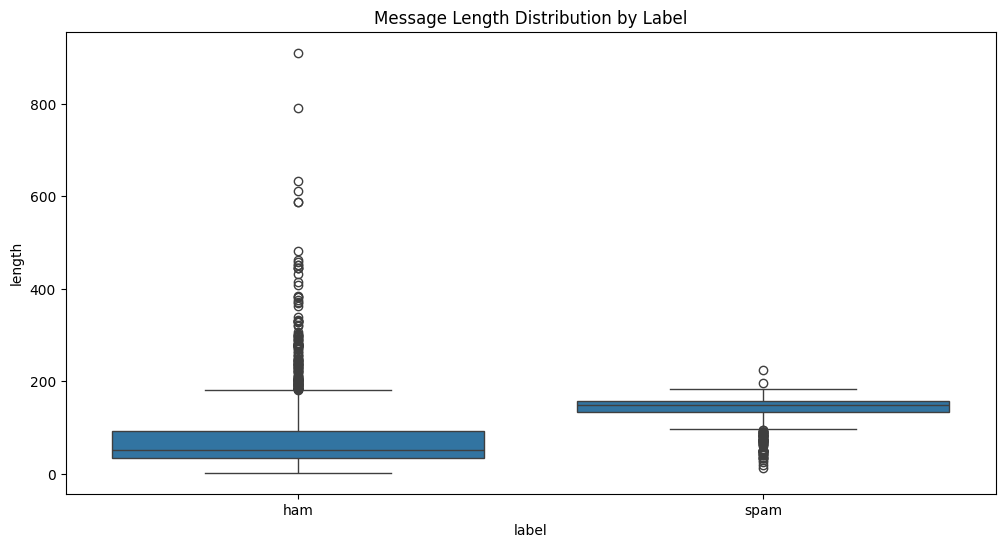

In [41]:
# Generate visualizations
plot_message_length_distribution()

Message Length Distribution by Label:

- Spam messages tend to have shorter lengths compared to ham (legitimate) messages.

- Ham messages have significant outliers with very long lengths.

- The median length of spam messages is relatively consistent.

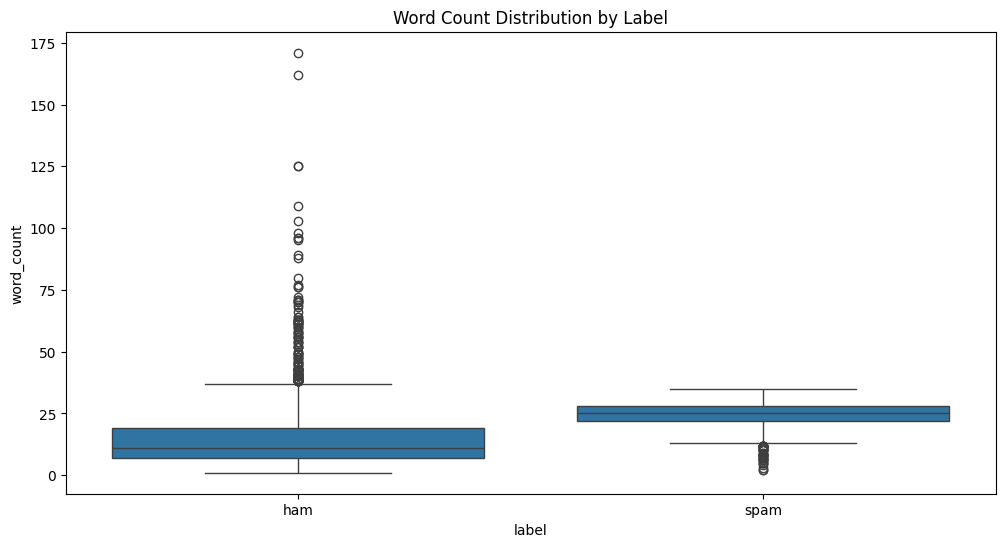

In [42]:
plot_word_count_distribution()


- Similar to message length, "ham" messages exhibit a wider distribution of word counts compared to "spam."

- There are several outliers in the word count for "ham," with some messages exceeding 100 words. Spam messages have a lower median word count and fewer outliers.

- Spam messages are often concise and to the point, focusing on delivering a specific call-to-action or advertisement.

- Ham messages include a broader range of word counts, reflecting their conversational or informational nature.

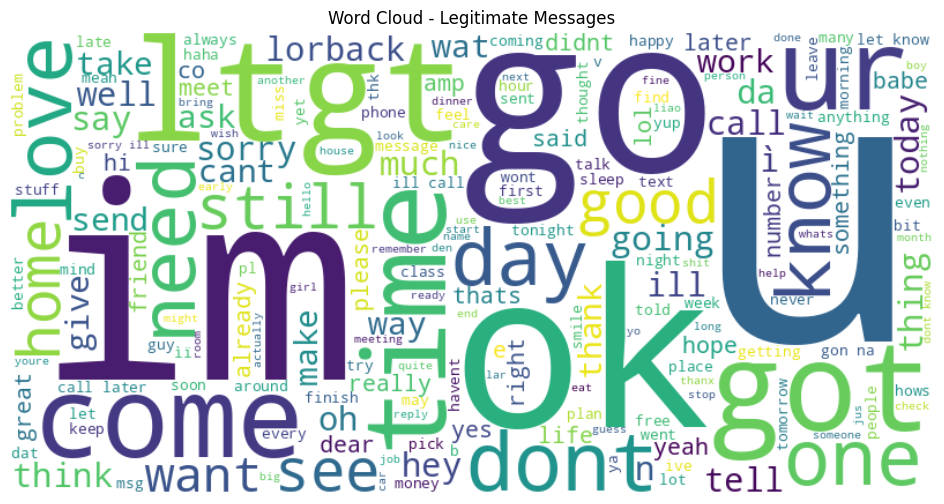

In [46]:
create_wordcloud(df[df['label'] == 'ham']['processed_text'], 'Word Cloud - Legitimate Messages')


Word Cloud - Legitimate Messages (Ham):

- Common words include "I'm," "u," "ok," "go," "know," "come".

- Reflects conversational and informal language.

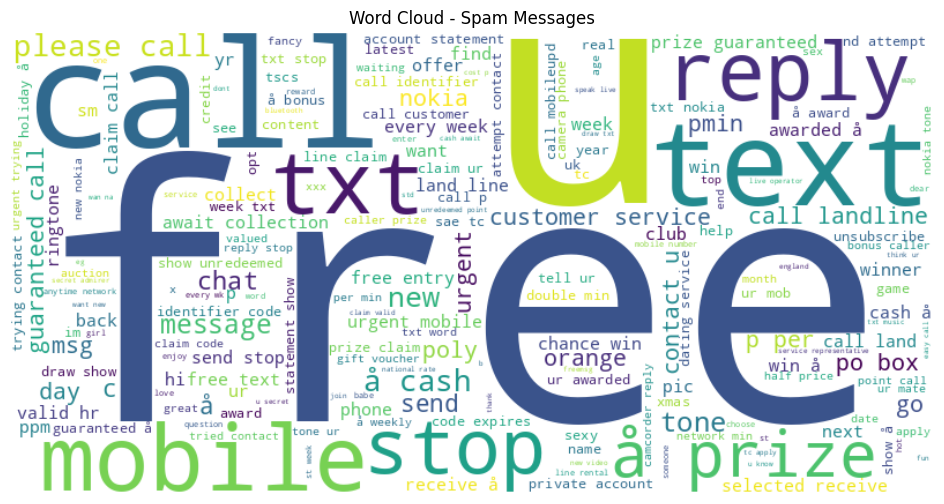

In [45]:
create_wordcloud(df[df['label'] == 'spam']['processed_text'], 'Word Cloud - Spam Messages')


Word Cloud - Spam Messages:

- Spam messages heavily rely on marketing language designed to grab attention and prompt action.

- Words indicate a focus on offers, prizes, and calls-to-action, often targeting recipients with promises of rewards.

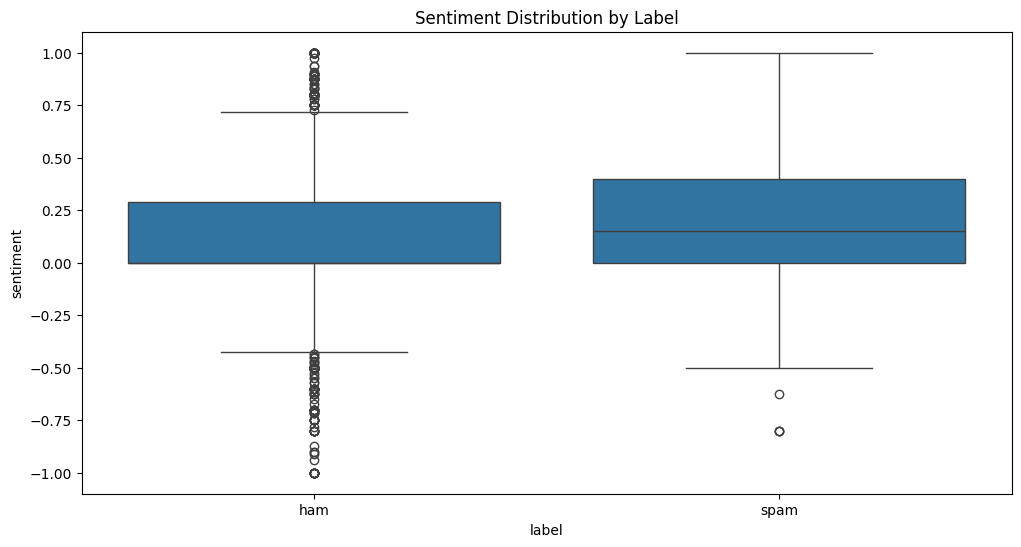

In [47]:
plot_sentiment_distribution()

Sentiment Distribution by Label:

- Ham messages have a wider range of sentiment scores, including both positive and negative outliers.

- Spam messages generally have a slightly positive sentiment.

In [48]:
# Statistical Analysis
print("\nFeature Statistics by Label:")
print(df.groupby('label')[['length', 'word_count', 'avg_word_length', 'sentiment']].describe())



Feature Statistics by Label:
       length                                                           \
        count        mean        std   min    25%    50%    75%    max   
label                                                                    
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0   
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0   

      word_count             ... avg_word_length            sentiment  \
           count       mean  ...             75%        max     count   
label                        ...                                        
ham       4825.0  14.200622  ...        5.428571  49.000000    4825.0   
spam       747.0  23.851406  ...        6.326667  18.166667     747.0   

                                                        
           mean       std  min  25%   50%     75%  max  
label                                                   
ham    0.116208  0.293931 -1.0  0.0  0.00  0.2875  1.0  
spam 

- Spam messages are significantly longer, with an average length of 139 characters, compared to 71 characters for ham messages.

- Spam messages have a higher average word count (24 words) than ham messages (14 words).

- Spam messages use slightly longer words on average (6.3 characters) compared to ham messages (5.4 characters).

- Spam messages tend to have a slightly more positive sentiment score (mean: 0.189) than ham messages (mean: 0.116).

In [49]:
# Most Common Words Analysis
def get_top_words(texts, n=10):
    words = ' '.join(texts).split()
    return Counter(words).most_common(n)

print("\nTop 10 Words in Legitimate Messages:")
print(get_top_words(df[df['label'] == 'ham']['processed_text']))

print("\nTop 10 Words in Spam Messages:")
print(get_top_words(df[df['label'] == 'spam']['processed_text']))


Top 10 Words in Legitimate Messages:
[('u', 1043), ('im', 451), ('get', 318), ('ltgt', 276), ('go', 275), ('ok', 272), ('dont', 257), ('got', 244), ('come', 242), ('know', 241)]

Top 10 Words in Spam Messages:
[('call', 361), ('å£', 270), ('free', 219), ('u', 163), ('txt', 150), ('ur', 144), ('text', 138), ('mobile', 136), ('stop', 116), ('claim', 115)]


In [50]:
# TF-IDF Analysis
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['processed_text'])


In [51]:
# Get top TF-IDF terms
def get_top_tfidf_terms(tfidf_vector, feature_names, n=10):
    sorted_items = sorted(zip(tfidf_vector, feature_names), key=lambda x: x[0], reverse=True)
    return [(feature, score) for score, feature in sorted_items[:n]]


In [52]:
# Print top TF-IDF terms for each class
ham_tfidf = tfidf_matrix[df['label'] == 'ham'].mean(axis=0).A1
spam_tfidf = tfidf_matrix[df['label'] == 'spam'].mean(axis=0).A1

In [53]:
print("\nTop TF-IDF terms in Legitimate Messages:")
print(get_top_tfidf_terms(ham_tfidf, tfidf.get_feature_names_out()))

print("\nTop TF-IDF terms in Spam Messages:")
print(get_top_tfidf_terms(spam_tfidf, tfidf.get_feature_names_out()))


Top TF-IDF terms in Legitimate Messages:
[('im', 0.025137059987062713), ('ok', 0.022869047331526362), ('get', 0.018073897829908744), ('come', 0.016894392210537287), ('ill', 0.016869915696820458), ('ltgt', 0.01652844253379785), ('call', 0.015706863756474804), ('got', 0.015414952726606621), ('dont', 0.014984708503761492), ('go', 0.014831084311910488)]

Top TF-IDF terms in Spam Messages:
[('call', 0.08735247664963007), ('free', 0.06090693664790022), ('txt', 0.045166209606240924), ('text', 0.04284220018399011), ('mobile', 0.04281610070479863), ('claim', 0.04035442797717686), ('stop', 0.03837521264776272), ('ur', 0.03626024945547946), ('prize', 0.03561308905429766), ('reply', 0.03274189579695415)]


## Conclusion

- The analysis reveals several key findings that can aid in spam detection:

- Spam messages tend to be longer and contain more words than legitimate messages.

- Legitimate messages often have a more varied vocabulary.

- Sentiment analysis can be helpful in distinguishing between spam and legitimate messages.

- Specific words and phrases are strongly associated with spam messages, as highlighted by TF-IDF analysis and word clouds.

## References

Here are 5 references from the search results:

1. [Almeida, D., Blei, D., Flaherty, P., Rao, A., Chassler, D., & Beletsky, L. (2020). The mixed-effects proportion of topic contributions model for analyzing conversations about opioid analgesics. Journal of the American Statistical Association, 115(529), 396-409.](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/48603429/97957c41-38be-42a1-9215-b975e42de19f/)

2. [Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of Machine Learning Research, 3, 993-1022.](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/48603429/960a956f-a979-4e05-9d1d-b360a8b05138/)

3. [Chen, X., Zou, D., Cheng, G., & Xie, H. (2020). Detecting latent topics and trends in educational technologies over four decades using structural topic modeling: A retrospective of all volumes of Computers & Education. Computers & Education, 151, 103855.](https://huggingface.co/datasets/ucirvine/sms_spam)

4. [Grimmer, J., & Stewart, B. M. (2013). Text as data: The promise and pitfalls of automatic content analysis methods for political texts. Political Analysis, 21(3), 267-297.](https://scholarworks.calstate.edu/downloads/wp988r98m)

5. [Roberts, M. E., Stewart, B. M., & Tingley, D. (2019). Stm: An R package for structural topic models. Journal of Statistical Software, 91(2), 1-40.](https://anale-informatica.tibiscus.ro/download/lucrari/Vol18/18-1-18-Taofeek.pdf)
